# Day 04 — Gradients (Multi-Weight Learning)

## Objective
Understand how **all model weights update together** using a single instruction:
the **gradient vector**.

This notebook is written to be:
- Shape-safe
- Debuggable
- Directly reusable in Week B (ML from scratch)

No formal calculus lectures. Only learning mechanics.


## From Derivative to Gradient

Day 3 answered:
> How should **one weight** change?

Day 4 answers:
> How should **all weights** change together?

In real models, loss depends on multiple weights:

$$
L(w_1, w_2, \dots, w_n)
$$

Each weight has its **own slope**.


In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Partial Derivatives

A partial derivative asks:

> "If I change **this one weight**, keeping all others fixed,
> how does the loss change?"

Key rule:
> **One weight = one learning signal**


## Gradient Vector

All partial derivatives combined form the **gradient**:

$$
\nabla L =
\begin{bmatrix}
\frac{\partial L}{\partial w_1} \\
\frac{\partial L}{\partial w_2} \\
\vdots \\
\frac{\partial L}{\partial w_n}
\end{bmatrix}
$$

The gradient is a **vector-valued instruction** for updating *all* weights.


In [2]:
def loss(w):
    """
    Simple 2D quadratic loss.
    w is a vector: [w1, w2]
    """
    return w[0]**2 + w[1]**2


## Analytical Gradient

For the loss:

$$
L(w_1, w_2) = w_1^2 + w_2^2
$$

Partial derivatives:
- $\frac{\partial L}{\partial w_1} = 2w_1$
- $\frac{\partial L}{\partial w_2} = 2w_2$


In [3]:
def gradient(w):
    """
    Gradient MUST have the SAME SHAPE as w.
    """
    return np.array([2 * w[0], 2 * w[1]])


## Gradient Shape Sanity Rule (NON-NEGOTIABLE)

**The gradient must have the EXACT SAME SHAPE as the weight vector.**

If:
- $W$ has shape $(n,)$ or $(n, 1)$

Then:
- $\nabla L$ must have the same shape

If this rule is violated:
- Weight update will crash
- Or silently produce incorrect results

This rule prevents Week B failures.


In [4]:
w = np.array([2.0, -1.0])
grad = gradient(w)

assert w.shape == grad.shape, "Gradient shape does NOT match weight shape"

w, grad


(array([ 2., -1.]), array([ 4., -2.]))

## Gradient Sign → Update Direction

At $w = (2, -1)$:

Gradient = $[4, -2]$

Interpretation:
- Positive component → decrease that weight
- Negative component → increase that weight

Learning always moves **opposite to the gradient**.


## Learning Rate Applies to the Entire Vector

The learning rate scales the **entire gradient vector**, not individual components.

Update logic:
- Scalar multiplication (learning rate × gradient)
- Vector subtraction (weights − scaled gradient)

This connects directly to Day 01 vector arithmetic.


In [5]:
learning_rate = 0.1

w_new = w - learning_rate * grad
w, w_new


(array([ 2., -1.]), array([ 1.6, -0.8]))

## Visualizing a Loss Surface

We now visualize:
- Loss contours (equal loss)
- Negative gradient arrows (steepest descent)

This turns abstract vectors into geometry.


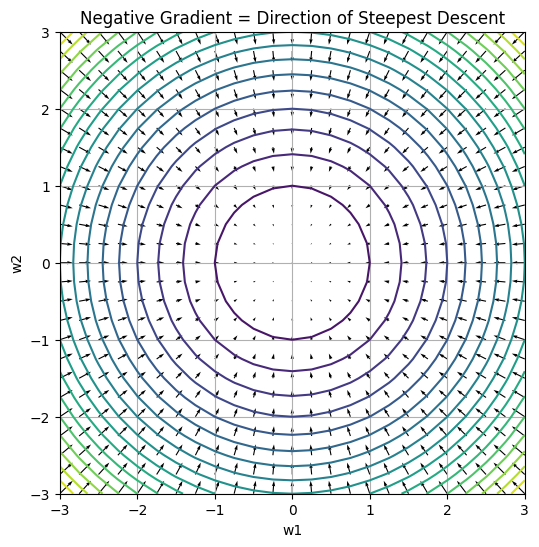

In [6]:
w1_vals = np.linspace(-3, 3, 25)
w2_vals = np.linspace(-3, 3, 25)

W1, W2 = np.meshgrid(w1_vals, w2_vals)
Z = W1**2 + W2**2

# Negative gradient for descent
U = -2 * W1
V = -2 * W2

plt.figure(figsize=(6, 6))
plt.contour(W1, W2, Z, levels=20)
plt.quiver(W1, W2, U, V)
plt.xlabel("w1")
plt.ylabel("w2")
plt.title("Negative Gradient = Direction of Steepest Descent")
plt.grid()
plt.show()


## Gradient Magnitude (Learning Strength)

The **magnitude** of the gradient tells us how strong the learning signal is.

We compute it using the **L2 norm**:

$$
\|\nabla L\|_2
$$

This uses vector magnitude from Day 01.


In [7]:
gradient_magnitude = np.linalg.norm(grad)
gradient_magnitude


np.float64(4.47213595499958)

## Convergence (Engineering Definition)

Convergence does NOT mean loss = 0.

Convergence means:
- Gradient magnitude becomes very small
- Weights stop changing meaningfully

Example stop condition:
- If $\|\nabla L\| < 0.001$ → stop training

This is your **mathematical stop button** for Week B.


## Day 4 Summary — Multi-Weight Learning Locked

- Each weight has its own slope
- Gradient collects all slopes into one vector
- Gradient shape must match weight shape
- Learning rate scales the whole update
- Convergence detected via gradient magnitude

This is the backbone of every optimizer.


## Stop Condition

You proceed only if you can:

- Enforce gradient–weight shape equality
- Predict update direction for each weight
- Explain why all weights update together
- Use gradient magnitude as a stop criterion

If any point is unclear, repeat Day 4.
